<a href="https://colab.research.google.com/github/acaicomdados/analise-barragens/blob/main/Notebook%20feito%20nos%20encontros/analise_de_cluster_barragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando clusterização no dataset

Neste notebook será feito análise  de cluster para segmentar as barragens e ver quai são os perfis de barragens que se tem no brasil com base no risco, no impacto e no teor de minerio presente na barragem e o nivel de emeregencia

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Pre-rocessamento inicial

não irei comentar muito pois já foi feito nos encontros anteriores

In [2]:
barragem = pd.read_csv('/content/drive/MyDrive/Datasets/Barragens.csv',encoding='latin1')
barragem = barragem.drop('ID',axis=1)
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Descrição da Estrutura Remanescente,Data de início das obras de estabilização ou descaracterização,Duração estimada em projeto das obras de estabilização ou descaracterização(em meses),A barragem voltará a operar?,Data de conclusão das obras de estabilização ou descaracterização,Data de Início do Monitoramento Ativo,Duração estimada em projeto do monitoramento ativo (em meses),Data de Início do Monitoramento Passivo,Data de conclusão estimada em projeto Monitoramento Passivo,Capacidade Total do Reservatório (m³)
0,Jacaré Inferior,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°47'16.100'',-63°34'30.600'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"410689,73"
1,MASSANGANA 01,COOPERATIVA DE PRODUTORES DE ESTANHO DO BRASIL...,26021163000144,RO,ARIQUEMES,-09°56'46.053'',-63°19'48.767'',Sul do Equador,Média,Baixa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"31991,75"
2,Rio Santa Cruz,COOPERMETAL - COOPERATIVA METALURGICA DE RONDONIA,09259736000153,RO,ARIQUEMES,-09°45'57.100'',-63°34'06.900'',Sul do Equador,Alta,Média,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4455613,00"
3,Jacaré Superior,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°49'01.200'',-63°33'11.500'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"68623000,03"
4,Jacaré Medio,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°47'43.800'',-63°33'55.000'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2815305,00"


In [3]:
barragem['Nome'] = barragem['Nome'].str.capitalize()
barragem['Empreendedor'] = barragem['Empreendedor'].str.capitalize()
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Descrição da Estrutura Remanescente,Data de início das obras de estabilização ou descaracterização,Duração estimada em projeto das obras de estabilização ou descaracterização(em meses),A barragem voltará a operar?,Data de conclusão das obras de estabilização ou descaracterização,Data de Início do Monitoramento Ativo,Duração estimada em projeto do monitoramento ativo (em meses),Data de Início do Monitoramento Passivo,Data de conclusão estimada em projeto Monitoramento Passivo,Capacidade Total do Reservatório (m³)
0,Jacaré inferior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-09°47'16.100'',-63°34'30.600'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"410689,73"
1,Massangana 01,Cooperativa de produtores de estanho do brasil...,26021163000144,RO,ARIQUEMES,-09°56'46.053'',-63°19'48.767'',Sul do Equador,Média,Baixa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"31991,75"
2,Rio santa cruz,Coopermetal - cooperativa metalurgica de rondonia,09259736000153,RO,ARIQUEMES,-09°45'57.100'',-63°34'06.900'',Sul do Equador,Alta,Média,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4455613,00"
3,Jacaré superior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-09°49'01.200'',-63°33'11.500'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"68623000,03"
4,Jacaré medio,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-09°47'43.800'',-63°33'55.000'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2815305,00"


In [10]:
barragem.drop(barragem.isna().sum()[101:115].index,axis=1,inplace=True)
barragem = pd.concat([barragem.iloc[:,0:20],barragem['Teor (%) do minério principal inserido no rejeito']],
           axis=1)
barragem.dropna(inplace=True)
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Inserido na PNSB,Nível de Emergência,Status da DCE Atual,Status da DCO Atual,Tipo de Barragem de Mineração,A Barragem de Mineração possui outra estrutura de mineração interna selante de reservatório,Quantidade Diques Internos,Quantidade Diques Selantes,A barragem de mineração possui Back Up Dam,Teor (%) do minério principal inserido no rejeito
0,Jacaré inferior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-09°47'16.100'',-63°34'30.600'',Sul do Equador,Alta,Alta,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,"0,05"
1,Massangana 01,Cooperativa de produtores de estanho do brasil...,26021163000144,RO,ARIQUEMES,-09°56'46.053'',-63°19'48.767'',Sul do Equador,Média,Baixa,...,Não,Sem emergência,-,-,Barragem/Barramento/Dique,Não,0.0,0.0,Não,"0,04"
2,Rio santa cruz,Coopermetal - cooperativa metalurgica de rondonia,09259736000153,RO,ARIQUEMES,-09°45'57.100'',-63°34'06.900'',Sul do Equador,Alta,Média,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,"0,05"
3,Jacaré superior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-09°49'01.200'',-63°33'11.500'',Sul do Equador,Alta,Alta,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,"0,04"
4,Jacaré medio,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-09°47'43.800'',-63°33'55.000'',Sul do Equador,Alta,Alta,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Atestado,Barragem/Barramento/Dique,Não,0.0,0.0,Não,"0,05"


In [11]:
barragem['Teor (%) do minério principal inserido no rejeito'] = barragem['Teor (%) do minério principal inserido no rejeito'].str.replace(
    'Não se aplica a esse tipo de barragem','0'
)
barragem['Teor (%) do minério principal inserido no rejeito'] = barragem['Teor (%) do minério principal inserido no rejeito'].str.replace(',','.')
barragem['Teor (%) do minério principal inserido no rejeito'] = barragem['Teor (%) do minério principal inserido no rejeito'].astype(float)

In [14]:
def grau_para_decimal(lat):
    partes = lat.split('°')
    graus = float(partes[0])

    partes_minutos = partes[1].split("'")
    minutos = float(partes_minutos[0])

    partes_segundos = partes_minutos[1].split('"')
    segundos = float(partes_segundos[0])

    if graus < 0:
        graus = -1*graus

    # Calculando a latitude decimal
    decimal = graus + (minutos / 60) + (segundos / 3600)
    return -1*decimal


barragem['Latitude'] = barragem['Latitude'].apply(grau_para_decimal)
barragem['Longitude'] = barragem['Longitude'].apply(grau_para_decimal)
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Inserido na PNSB,Nível de Emergência,Status da DCE Atual,Status da DCO Atual,Tipo de Barragem de Mineração,A Barragem de Mineração possui outra estrutura de mineração interna selante de reservatório,Quantidade Diques Internos,Quantidade Diques Selantes,A barragem de mineração possui Back Up Dam,Teor (%) do minério principal inserido no rejeito
0,Jacaré inferior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.787806,-63.575167,Sul do Equador,Alta,Alta,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05
1,Massangana 01,Cooperativa de produtores de estanho do brasil...,26021163000144,RO,ARIQUEMES,-9.946126,-63.330213,Sul do Equador,Média,Baixa,...,Não,Sem emergência,-,-,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.04
2,Rio santa cruz,Coopermetal - cooperativa metalurgica de rondonia,09259736000153,RO,ARIQUEMES,-9.765861,-63.568583,Sul do Equador,Alta,Média,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05
3,Jacaré superior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.817000,-63.553194,Sul do Equador,Alta,Alta,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.04
4,Jacaré medio,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.795500,-63.565278,Sul do Equador,Alta,Alta,...,Sim,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Atestado,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05


## Pré-processamento para a clusterização

Agora vamos tranforma as variaveis categoria de risco, dano potencial e nivel de emergencia em variaveis numericas categoricas, juntar com o tero e aplicar a clusterização

In [15]:
X = barragem[['Nível de Emergência','Categoria de Risco - CRI','Dano Potencial Associado - DPA',
              'Teor (%) do minério principal inserido no rejeito']]
X.head()

,Nível de Emergência,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Teor (%) do minério principal inserido no rejeito
0,Emergência Nivel 1,Alta,Alta,0.05
1,Sem emergência,Média,Baixa,0.04
2,Emergência Nivel 1,Alta,Média,0.05
3,Emergência Nivel 1,Alta,Alta,0.04
4,Emergência Nivel 1,Alta,Alta,0.05


In [18]:
X['Dano Potencial Associado - DPA'].unique()

array(['Alta', 'Baixa', 'Média', 'Não se aplica'], dtype=object)

In [19]:
X['Nível de Emergência'] = X['Nível de Emergência'].map({'Sem emergência':0,'Emergência Nivel 1':1,'Emergência Nivel 2':2,
                                                         'Emergência Nivel 3':3,'Nível de Alerta':4})
X['Categoria de Risco - CRI'] = X['Categoria de Risco - CRI'].map({'Não se aplica':0,'Baixa':1,'Média':2,
                                                                   'Alta':3})
X['Dano Potencial Associado - DPA'] = X['Dano Potencial Associado - DPA'].map({'Não se aplica':0,'Baixa':1,'Média':2,
                                                                   'Alta':3})
X.head()

<ipython-input-19-a018fae5796e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-a018fae5796e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-a018fae5796e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Nível de Emergência,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Teor (%) do minério principal inserido no rejeito
0,1,3,3,0.05
1,0,2,1,0.04
2,1,3,2,0.05
3,1,3,3,0.04
4,1,3,3,0.05


In [20]:
std = StandardScaler()
X_std = std.fit_transform(X)

## Modelagem

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

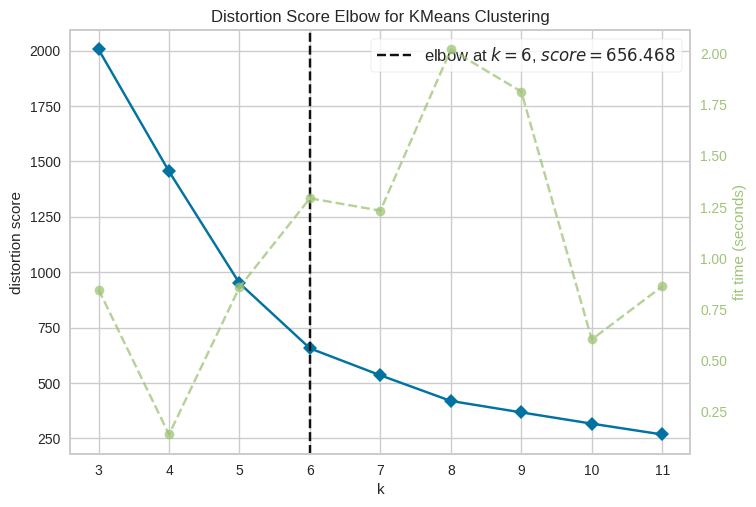

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
visualizer1 = KElbowVisualizer(KMeans(), k=(3,12))
visualizer1.fit(X_std)
visualizer1.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

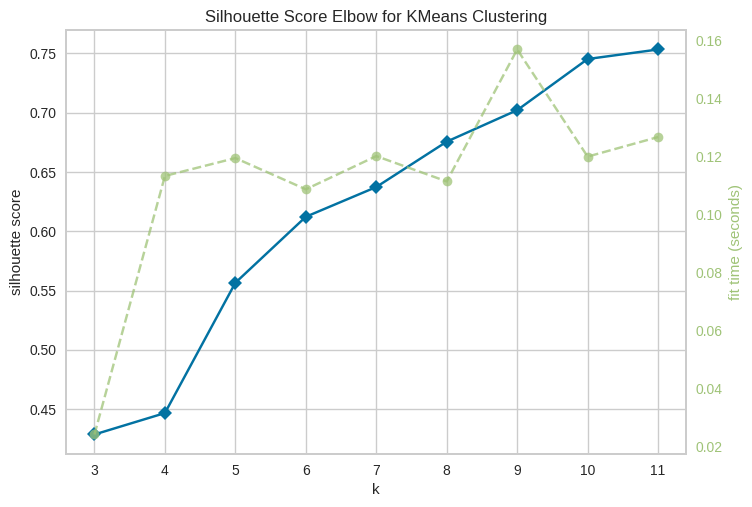

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
visualizer2 = KElbowVisualizer(KMeans(), k=(3,12),metric='silhouette')
visualizer2.fit(X_std)
visualizer2.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

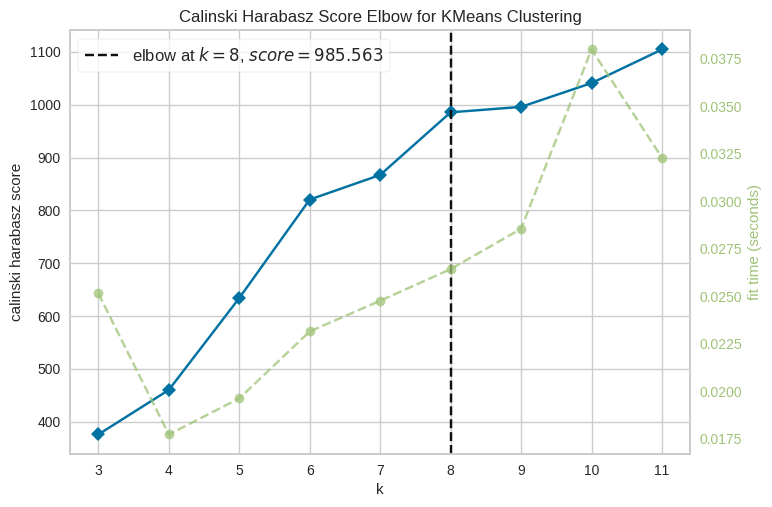

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
visualizer3 = KElbowVisualizer(KMeans(), k=(3,12),metric='calinski_harabasz')
visualizer3.fit(X_std)
visualizer3.show()

In [45]:
# Aplicação do kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_std)

barragem['Cluster'] = kmeans.labels_
barragem.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Nível de Emergência,Status da DCE Atual,Status da DCO Atual,Tipo de Barragem de Mineração,A Barragem de Mineração possui outra estrutura de mineração interna selante de reservatório,Quantidade Diques Internos,Quantidade Diques Selantes,A barragem de mineração possui Back Up Dam,Teor (%) do minério principal inserido no rejeito,Cluster
0,Jacaré inferior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.787806,-63.575167,Sul do Equador,Alta,Alta,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05,2
1,Massangana 01,Cooperativa de produtores de estanho do brasil...,26021163000144,RO,ARIQUEMES,-9.946126,-63.330213,Sul do Equador,Média,Baixa,...,Sem emergência,-,-,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.04,2
2,Rio santa cruz,Coopermetal - cooperativa metalurgica de rondonia,09259736000153,RO,ARIQUEMES,-9.765861,-63.568583,Sul do Equador,Alta,Média,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05,2
3,Jacaré superior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.817000,-63.553194,Sul do Equador,Alta,Alta,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.04,2
4,Jacaré medio,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.795500,-63.565278,Sul do Equador,Alta,Alta,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Atestado,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05,2


## Avaliação

<ipython-input-46-546dd42a62ae>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Cluster', ylabel='count'>

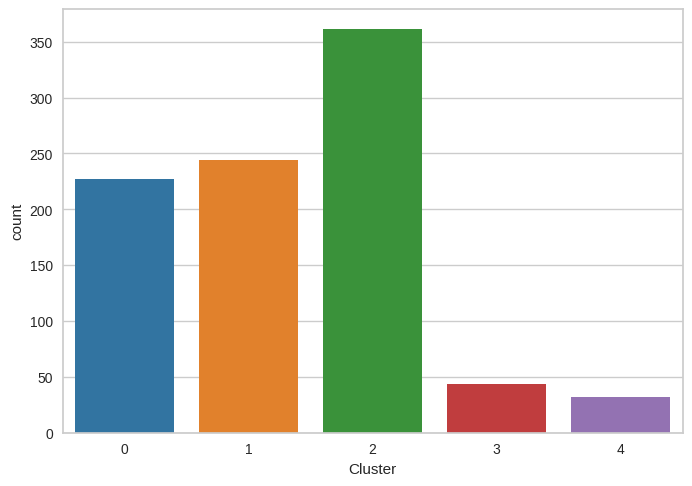

In [46]:
sns.countplot(data=barragem,x='Cluster',
              palette='tab10')

<Axes: xlabel='Nível de Emergência', ylabel='count'>

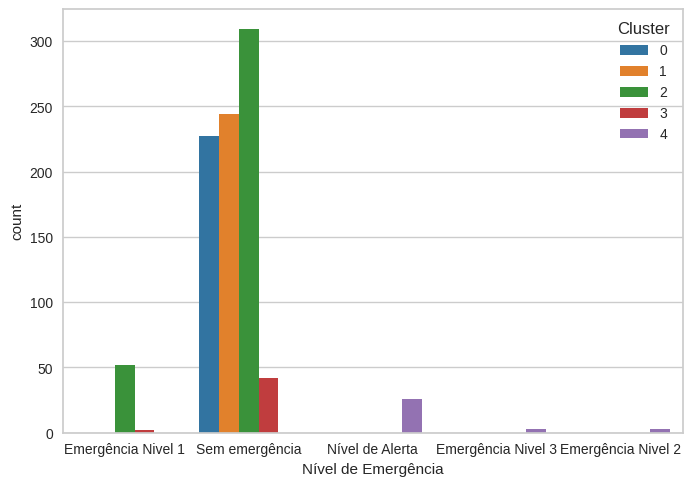

In [47]:
sns.countplot(x='Nível de Emergência',data=barragem,hue='Cluster',
              palette='tab10')

<Axes: xlabel='Categoria de Risco - CRI', ylabel='count'>

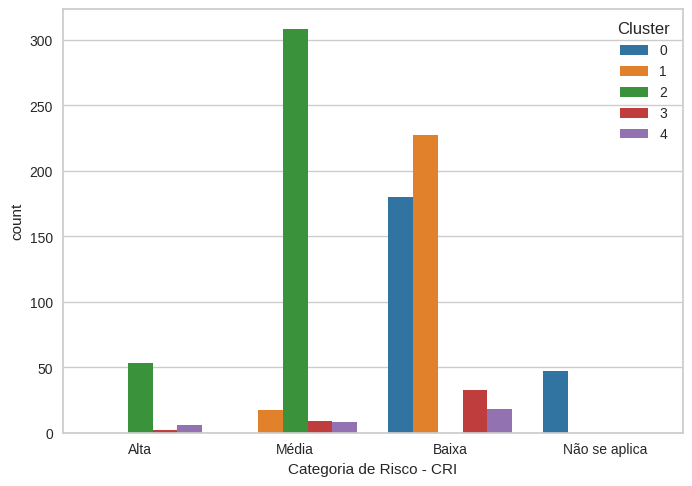

In [48]:
sns.countplot(x='Categoria de Risco - CRI',data=barragem,hue='Cluster',
              palette='tab10')

<Axes: xlabel='Dano Potencial Associado - DPA', ylabel='count'>

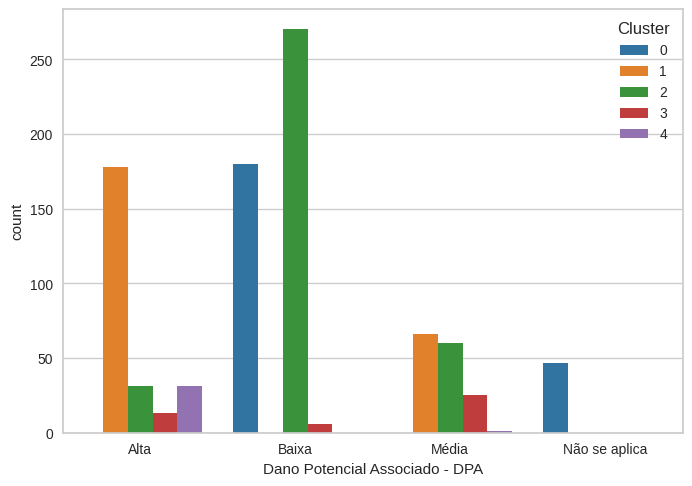

In [49]:
sns.countplot(x='Dano Potencial Associado - DPA',data=barragem,hue='Cluster',
              palette='tab10')

<Axes: xlabel='Cluster', ylabel='Teor (%) do minério principal inserido no rejeito'>

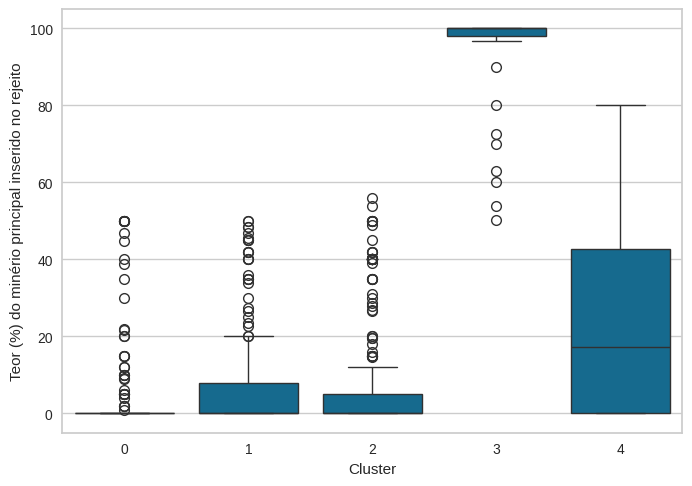

In [50]:
sns.boxplot(x='Cluster',y='Teor (%) do minério principal inserido no rejeito',
            data=barragem)

In [51]:
# o cluster 1 e cluster 2 são muito parecido então vou juntar eles
barragem['Cluster'] = barragem['Cluster'].map({0:0,1:1,2:1,3:2,4:3})

NameError: name 'barrgem' is not defined

In [52]:
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Nível de Emergência,Status da DCE Atual,Status da DCO Atual,Tipo de Barragem de Mineração,A Barragem de Mineração possui outra estrutura de mineração interna selante de reservatório,Quantidade Diques Internos,Quantidade Diques Selantes,A barragem de mineração possui Back Up Dam,Teor (%) do minério principal inserido no rejeito,Cluster
0,Jacaré inferior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.787806,-63.575167,Sul do Equador,Alta,Alta,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05,1
1,Massangana 01,Cooperativa de produtores de estanho do brasil...,26021163000144,RO,ARIQUEMES,-9.946126,-63.330213,Sul do Equador,Média,Baixa,...,Sem emergência,-,-,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.04,1
2,Rio santa cruz,Coopermetal - cooperativa metalurgica de rondonia,09259736000153,RO,ARIQUEMES,-9.765861,-63.568583,Sul do Equador,Alta,Média,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05,1
3,Jacaré superior,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.817000,-63.553194,Sul do Equador,Alta,Alta,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Indefinido,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.04,1
4,Jacaré medio,Cooperativa dos garimpeiros de santa cruz - co...,34726547000190,RO,ARIQUEMES,-9.795500,-63.565278,Sul do Equador,Alta,Alta,...,Emergência Nivel 1,1º Campanha 2024 - Não Enviado,1º Campanha 2023 - Atestado,Barragem/Barramento/Dique,Não,0.0,0.0,Não,0.05,1


<ipython-input-53-546dd42a62ae>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Cluster', ylabel='count'>

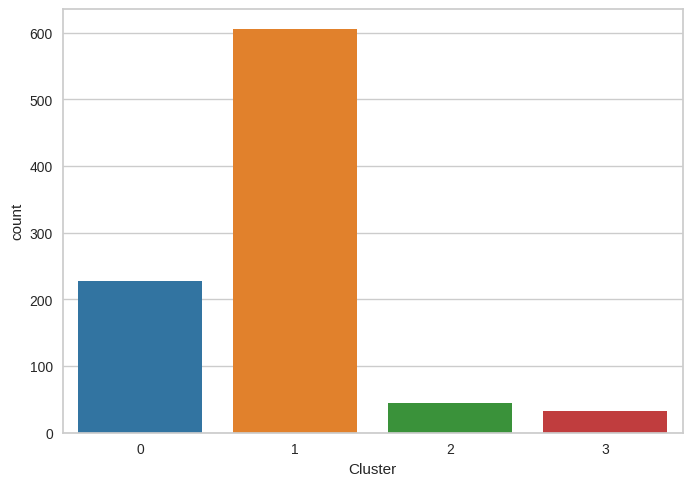

In [53]:
sns.countplot(data=barragem,x='Cluster',
              palette='tab10')

<Axes: xlabel='Nível de Emergência', ylabel='count'>

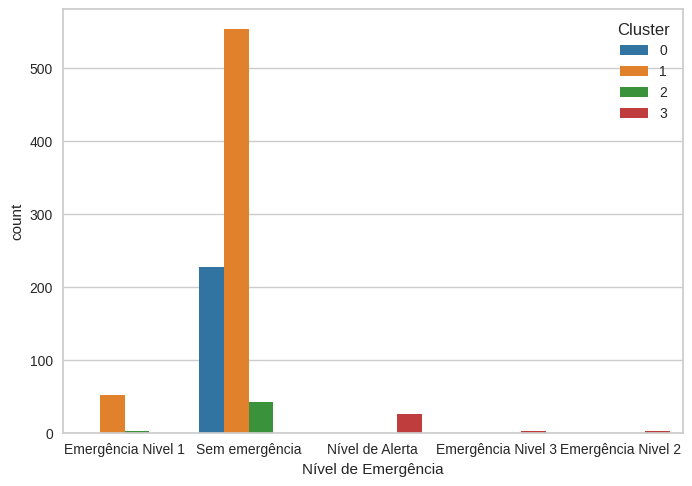

In [54]:
sns.countplot(x='Nível de Emergência',data=barragem,hue='Cluster',
              palette='tab10')

<Axes: xlabel='Categoria de Risco - CRI', ylabel='count'>

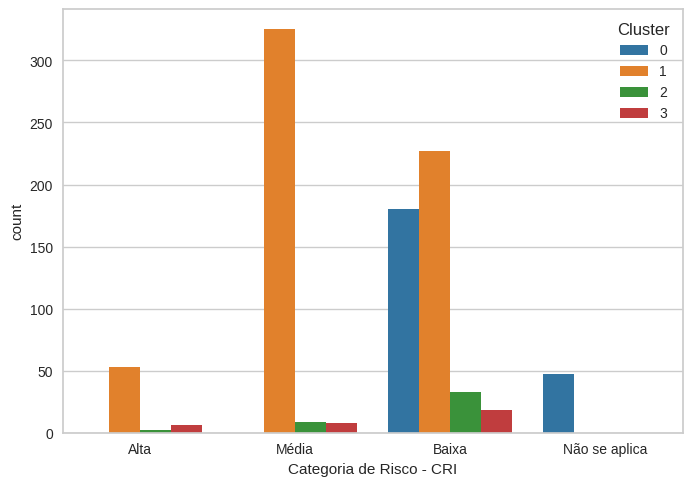

In [55]:
sns.countplot(x='Categoria de Risco - CRI',data=barragem,hue='Cluster',
              palette='tab10')

<Axes: xlabel='Dano Potencial Associado - DPA', ylabel='count'>

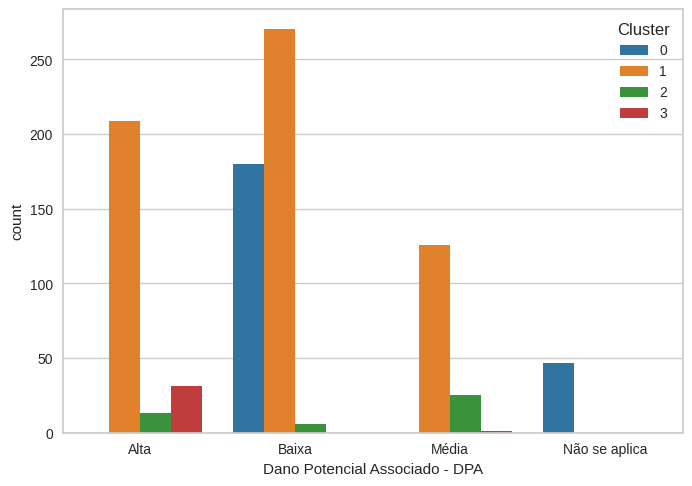

In [56]:
sns.countplot(x='Dano Potencial Associado - DPA',data=barragem,hue='Cluster',
              palette='tab10')

<Axes: xlabel='Cluster', ylabel='Teor (%) do minério principal inserido no rejeito'>

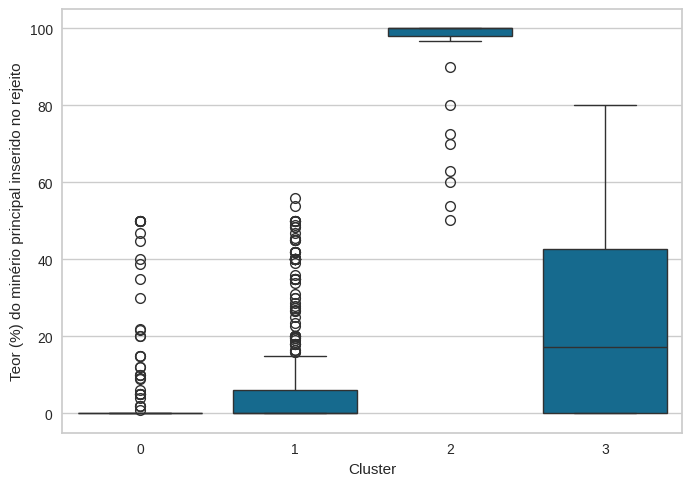

In [57]:
sns.boxplot(x='Cluster',y='Teor (%) do minério principal inserido no rejeito',
            data=barragem)

In [62]:
pontos = px.scatter_mapbox(barragem,lat='Latitude',lon='Longitude',hover_name='Nome',hover_data=['Empreendedor','Município','Categoria de Risco - CRI',
                                                                                                 'Nível de Emergência','Dano Potencial Associado - DPA',
                                                                                                 'Teor (%) do minério principal inserido no rejeito'],
                           color=barragem['Cluster'].astype(str),
                           title='Barragem de acordo com os Clusters',
                           labels={'color':'Cluster'},height=700)
pontos.update_layout(mapbox_style='open-street-map')
pontos.show()

Por fim, temos os clusters

- Cluster 0
  - sem emergencia
  - categoria de risco não se aplica ou é baixo
  - dano não se aplica ou é baixo
  - teor próximo de zero em sua maioria

- Cluster 1
  - sem emergencia ou nivel 1
  - teor entre 0 a 10% em sua maioria
- Cluster 2
  - sem emergencia ou nivel 1
  - teor de minerio alto, proximo a 100% em sua maioria
- Cluster 3
  - nivel de emergencia 2, 3 e nivel de alerta
  - dano potencial alto
  - teor de minerio aprox de 0 a 40%


Podemos ver que o teor de minerio foi algo pra diferenciar os cluster, podemos ver que o cluster 3 devemos ter uma atenção especial e o cluster 2 deveria saber por que tem um teor de minerio muito alto nas barragens